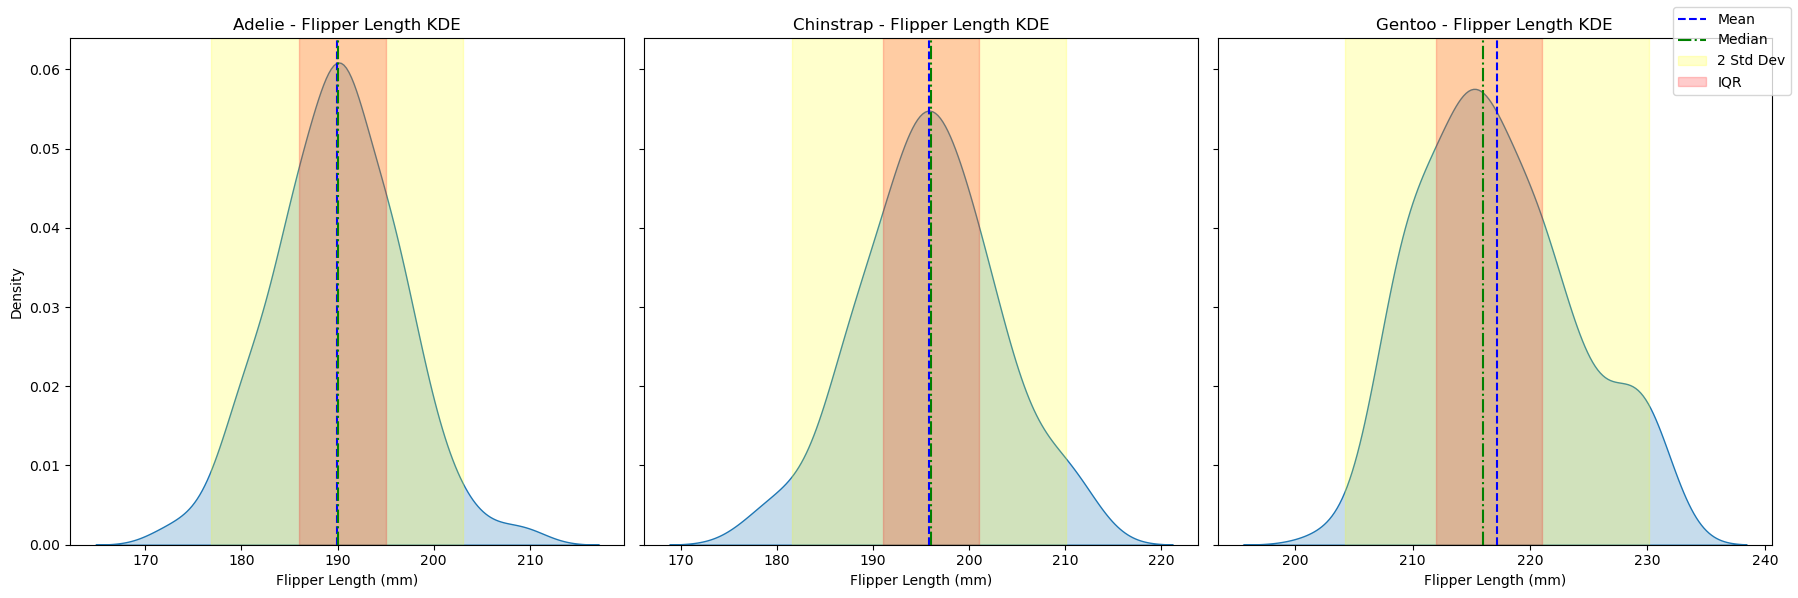

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    std='std',
    min_val='min',
    max_val='max',
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75)
)

stats['2_std_lower'] = stats['mean'] - 2 * stats['std']
stats['2_std_upper'] = stats['mean'] + 2 * stats['std']

species_list = penguins['species'].unique()

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, species in enumerate(species_list):
    ax = axes[i]
     
    sns.kdeplot(data=penguins[penguins['species'] == species], x='flipper_length_mm', ax=ax, fill=True)
     
    ax.axvline(stats.loc[species, 'mean'], color='blue', linestyle='--', label='Mean')
    ax.axvline(stats.loc[species, 'median'], color='green', linestyle='-.', label='Median')
    
    ax.axvspan(stats.loc[species, '2_std_lower'], stats.loc[species, '2_std_upper'], color='yellow', alpha=0.2, label='2 Std Dev')
    ax.axvspan(stats.loc[species, 'Q1'], stats.loc[species, 'Q3'], color='red', alpha=0.2, label='IQR')
    
    ax.set_title(f'{species} - Flipper Length KDE')
    ax.set_xlabel('Flipper Length (mm)')
    if i == 0:
        ax.set_ylabel('Density')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()
plt.show()


Question 3) I would say that depending on what you need from the dataset is the rationale you should have when having a preference here, but if I had to choose I would say KDE. This is beacause it shows the most amount of things about the data set with little room for bias. As we know a histogram can be misleading if there is bias towards the bin range and I believe that a KDE solves that problem by smoothing out all the data points into one graph rather than bins. Comparing it to the box plot, my rationale is that you can highlight the quartiles and median as we did in the code before so it almost gets rid of the need for a box plot.

In [10]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Question 4)<br>
1. Graph B and D <br>
2. Graph A and B<br>
3. Graph C and D<br>
4. Graph A and C<br>

In [19]:
import pandas as pd
import plotly.express as px

# Load the dataset
url = "https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv"
df = pd.read_csv(url)
df = df.dropna()
# 1. Distribution of Superhero Genders
fig_gender = px.histogram(df, x='Gender', title="Distribution of Superhero Genders", 
                          labels={'Gender':'Gender'}, color='Gender')
fig_gender.show()

# 2. Distribution of Superhero Powers (like intelligence, strength, speed)
fig_powers = px.histogram(df, x='Intelligence', title="Distribution of Superhero Intelligence", 
                          labels={'Intelligence':'Intelligence Level'}, nbins=10)
fig_powers.show()

# 3. Distribution of Alignment (Good, Neutral, Bad)
fig_alignment = px.histogram(df, x='Alignment', title="Distribution of Superhero Alignment", 
                             labels={'Alignment':'Alignment'}, color='Alignment')
fig_alignment.show()



Question 6) Using histograms to visualize some aspects of the data given we can see some very interesting things about this sample set of superheroes. We can see that although a slight majority of these superheroes are good, there are more bad and neutral heroes rather than good. Maybe they're getting paid less to be good? We can also see that the we have most superheroes fall in the 80-100 range of intelligence level, but I feel that the more interesting thing is that there is one hero with a level less than 20; I wonder what they do with their powers. Finally, we can see that majority of these heroes are male by a wide margin, but I think that is just relative to the dataset of chosen heroes.

Question 1 and 2 chatbot log:https://chatgpt.com/share/66f61cc8-e4ec-8004-81c3-8692694142ac <br>
Question 3 chatbot log:https://chatgpt.com/share/66f622e3-ac84-8004-a55a-6771a5090ac1 <br>
